# MINIPROJECT 2022-23: KYPHOSIS DISEASE DETECTION ON CHILDREN WHO HAD CORRECTIVE SPINAL SURGERY

**MADE BY: DEVANSH GOEL, STUDENT ID: 20011990**

# TASK 1: UNDERSTAND THE PROBLEM STATEMENT

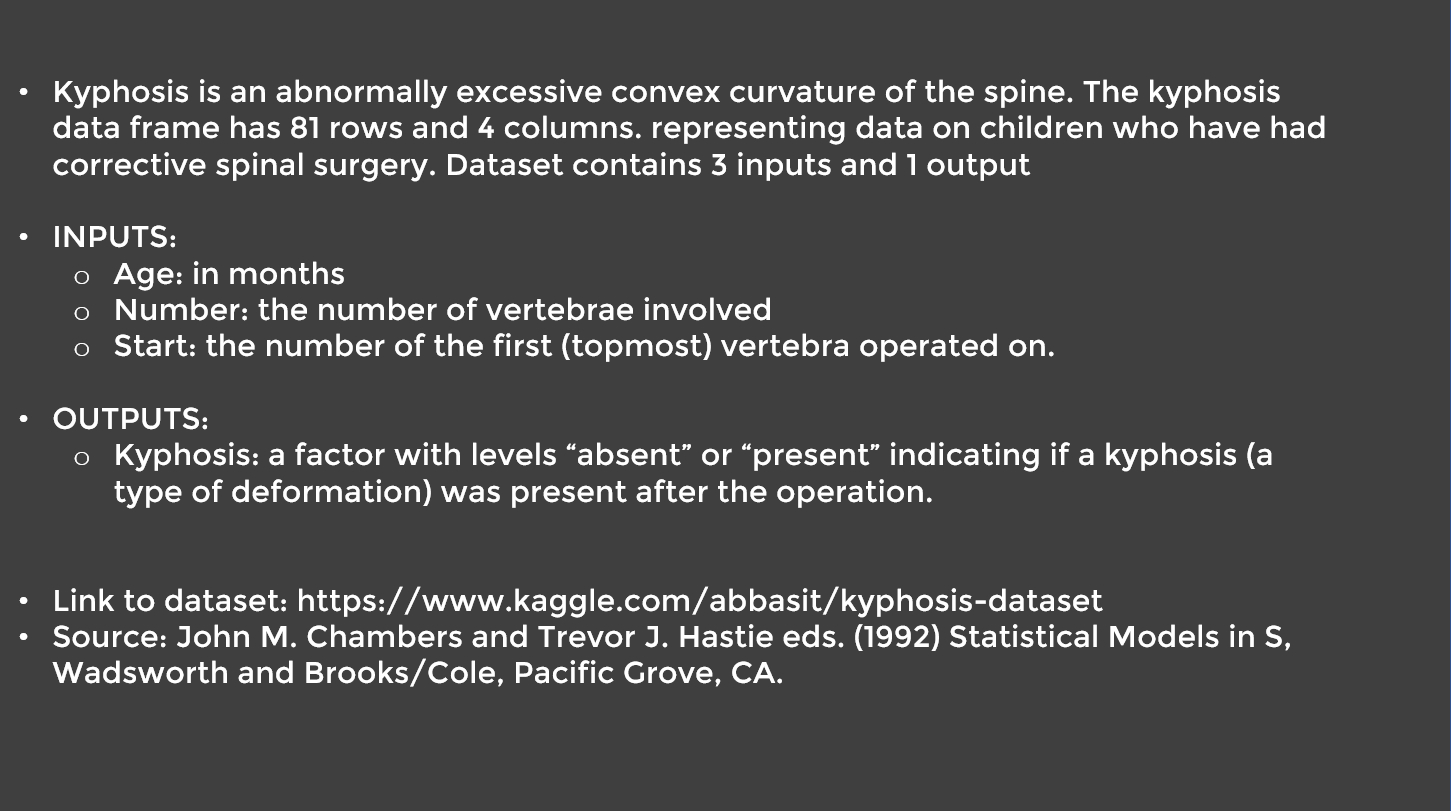

# TASK #2: IMPORT LIBRARIES AND DATASETS


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
#setting the style of the notebook to be monokai theme  
#this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [2]:
kyphosis_df = pd.read_csv("kyphosis.csv")

In [3]:
kyphosis_df

Kyphosis  Age  Number  Start
0    absent   71       3      5
1    absent  158       3     14
2   present  128       4      5
3    absent    2       5      1
4    absent    1       4     15
..      ...  ...     ...    ...
76  present  157       3     13
77   absent   26       7     13
78   absent  120       2     13
79  present   42       7      6
80   absent   36       4     13

[81 rows x 4 columns]

In [4]:
kyphosis_df.tail(7)

Kyphosis  Age  Number  Start
74   absent   11       3     15
75   absent  178       4     15
76  present  157       3     13
77   absent   26       7     13
78   absent  120       2     13
79  present   42       7      6
80   absent   36       4     13

In [5]:
kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
kyphosis_df.describe()

Age     Number      Start
count   81.000000  81.000000  81.000000
mean    83.654321   4.049383  11.493827
std     58.104251   1.619423   4.883962
min      1.000000   2.000000   1.000000
25%     26.000000   3.000000   9.000000
50%     87.000000   4.000000  13.000000
75%    130.000000   5.000000  16.000000
max    206.000000  10.000000  18.000000

# TASK #3: PERFORM DATA VISUALIZATION

In [7]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
LabelEncoder_y = LabelEncoder()
kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(kyphosis_df['Kyphosis'])

In [434]:
kyphosis_df

Kyphosis  Age  Number  Start
0          0   71       3      5
1          0  158       3     14
2          1  128       4      5
3          0    2       5      1
4          0    1       4     15
..       ...  ...     ...    ...
76         1  157       3     13
77         0   26       7     13
78         0  120       2     13
79         1   42       7      6
80         0   36       4     13

[81 rows x 4 columns]

In [435]:
Kyphosis_True = kyphosis_df[kyphosis_df['Kyphosis']==1]

In [436]:
Kyphosis_False = kyphosis_df[kyphosis_df['Kyphosis']==0]

In [437]:
print( 'Disease present after operation percentage =', (len(Kyphosis_True) / len(kyphosis_df) )*100,"%")

Disease present after operation percentage = 20.98765432098765 %


<AxesSubplot:>

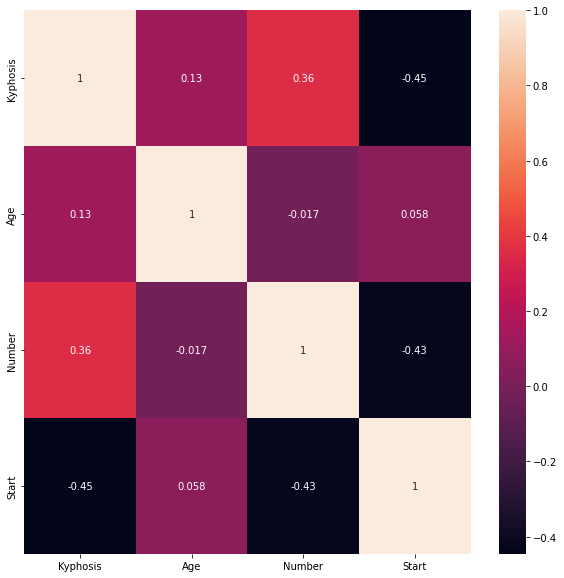

In [8]:
plt.figure(figsize=(10,10)) 
sns.heatmap(kyphosis_df.corr(),annot=True)

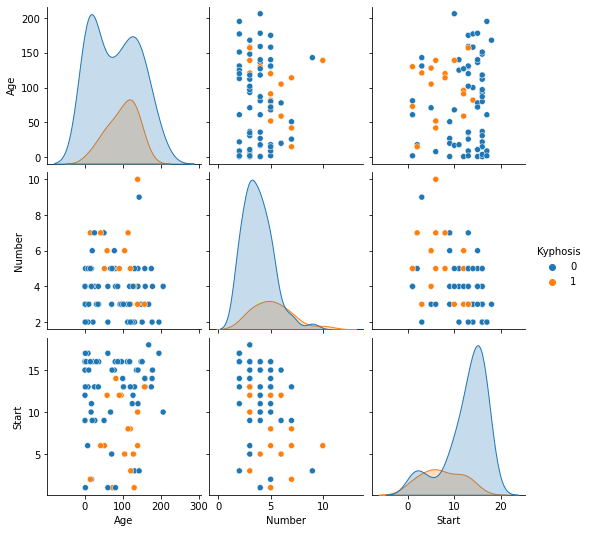

In [9]:
sns.pairplot(kyphosis_df, hue='Kyphosis')

<AxesSubplot:xlabel='Kyphosis', ylabel='count'>

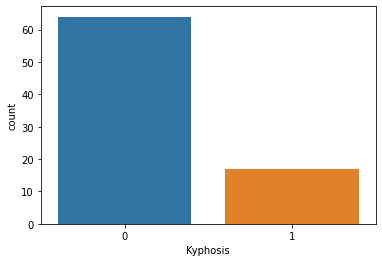

In [10]:
sns.countplot(x=kyphosis_df["Kyphosis"])

# TASK #4: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [11]:
# Let's drop the target label coloumns
x=kyphosis_df.drop(["Kyphosis"],axis=1)
y=kyphosis_df["Kyphosis"]

In [442]:
x

Age  Number  Start
0    71       3      5
1   158       3     14
2   128       4      5
3     2       5      1
4     1       4     15
..  ...     ...    ...
76  157       3     13
77   26       7     13
78  120       2     13
79   42       7      6
80   36       4     13

[81 rows x 3 columns]

In [443]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int32

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [446]:
x_train.shape

(64, 3)

In [447]:
x_test.shape


(17, 3)

# TASK #5: TRAIN A LOGISTIC REGRESSION CLASSIFIER MODEL

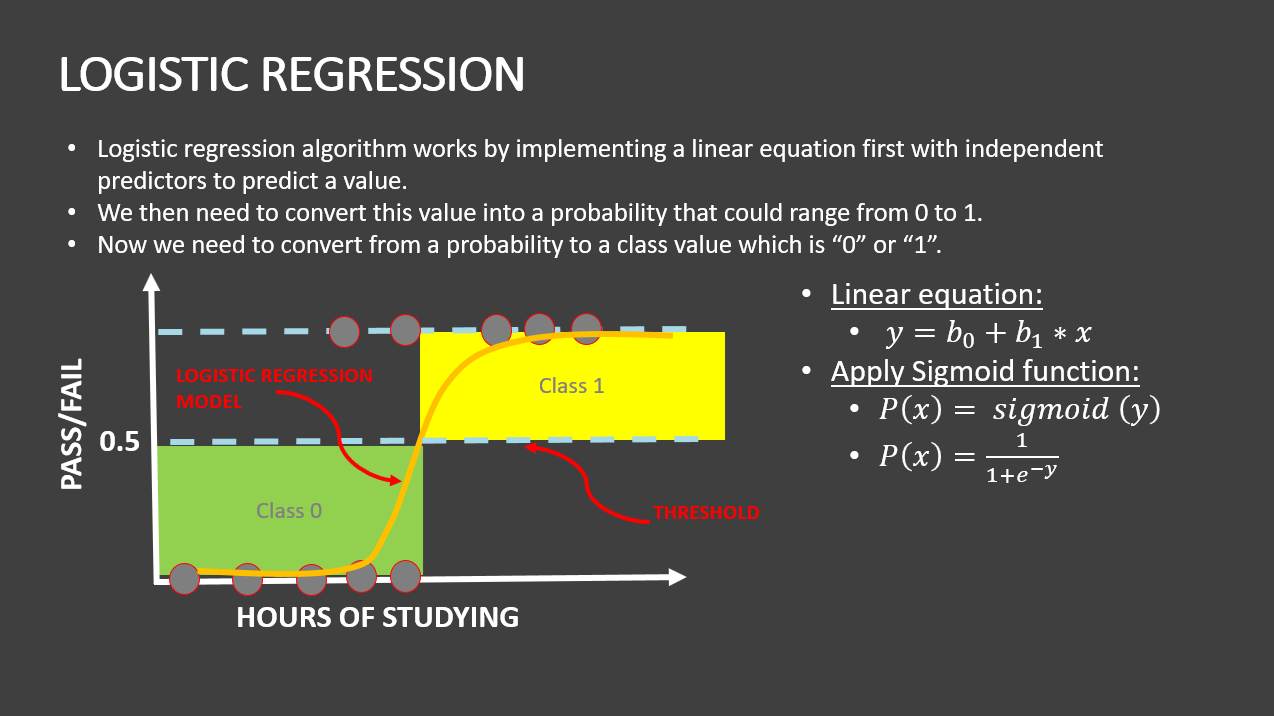

In [449]:
x_train.shape

(64, 3)

In [450]:
y_train.shape

(64,)

In [451]:
x_test.shape

(17, 3)

In [452]:
y_test.shape

(17,)

In [14]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

# TASK #6: EVALUATE TRAINED MODEL PERFORMANCE 

In [15]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
model_accuracy={}

<AxesSubplot:>

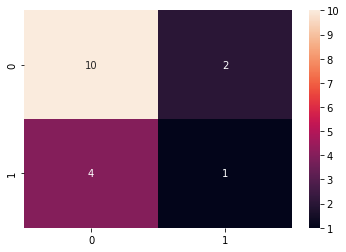

In [16]:
# Predicting the Test set results
y_predict_test=model.predict(x_test)
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)

In [17]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.33      0.20      0.25         5

    accuracy                           0.65        17
   macro avg       0.52      0.52      0.51        17
weighted avg       0.60      0.65      0.62        17



In [18]:
model_accuracy["Logistic_Regression"]=accuracy_score(y_test,y_predict_test)

# TASK #7: UNDERSTAND THE THEORY AND INTUITION BEHIND DECISION TREES AND RANDOM FOREST CLASSIFIER MODELS

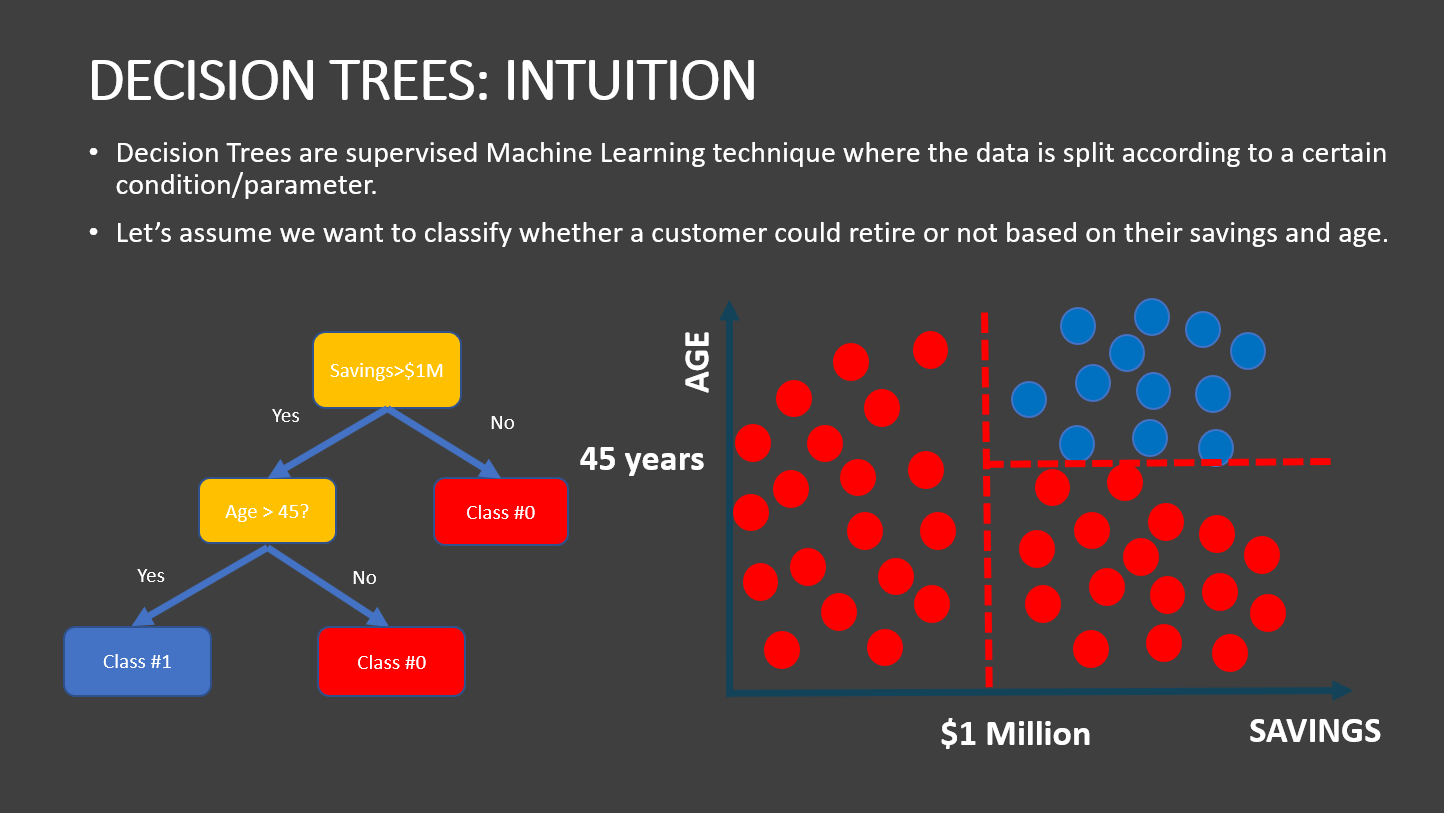

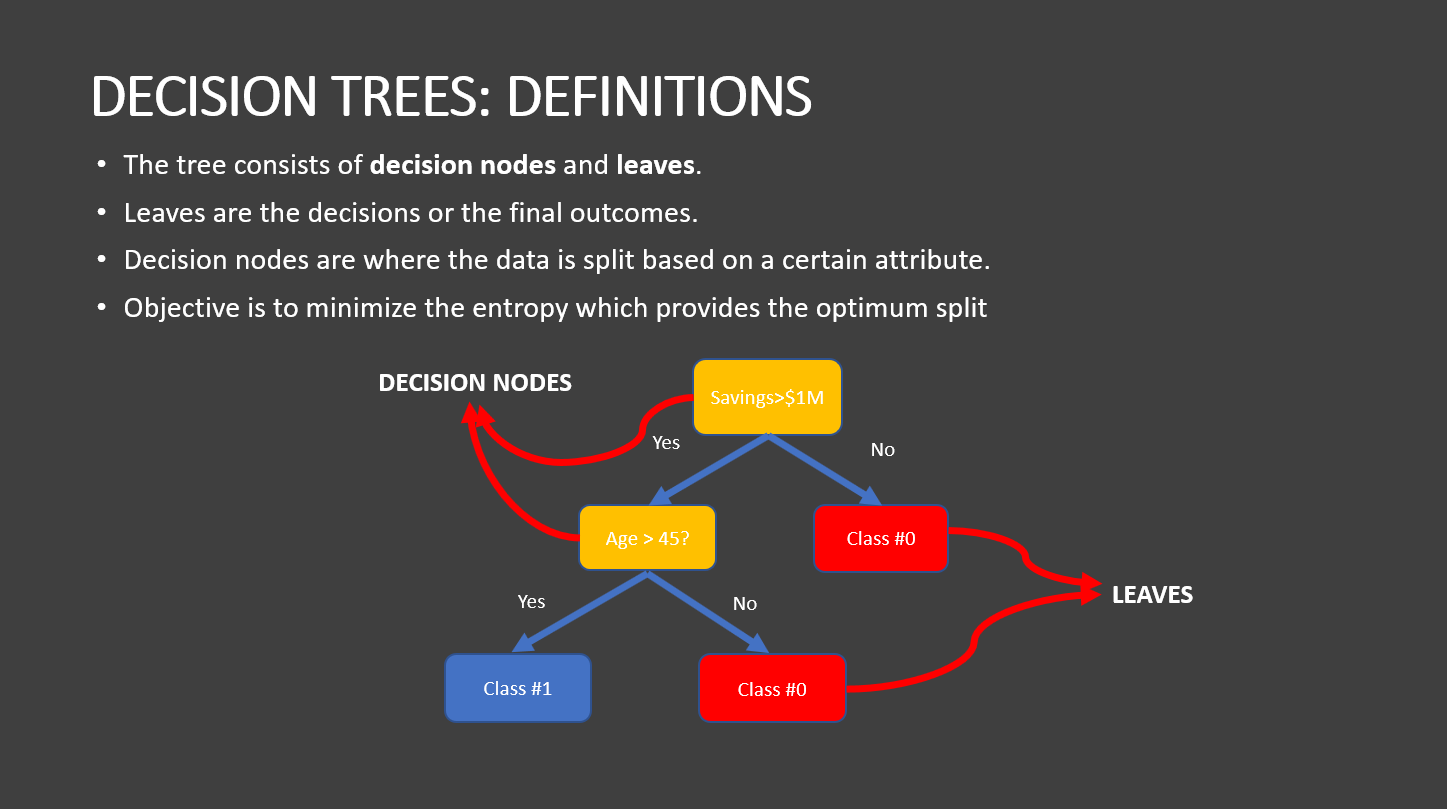

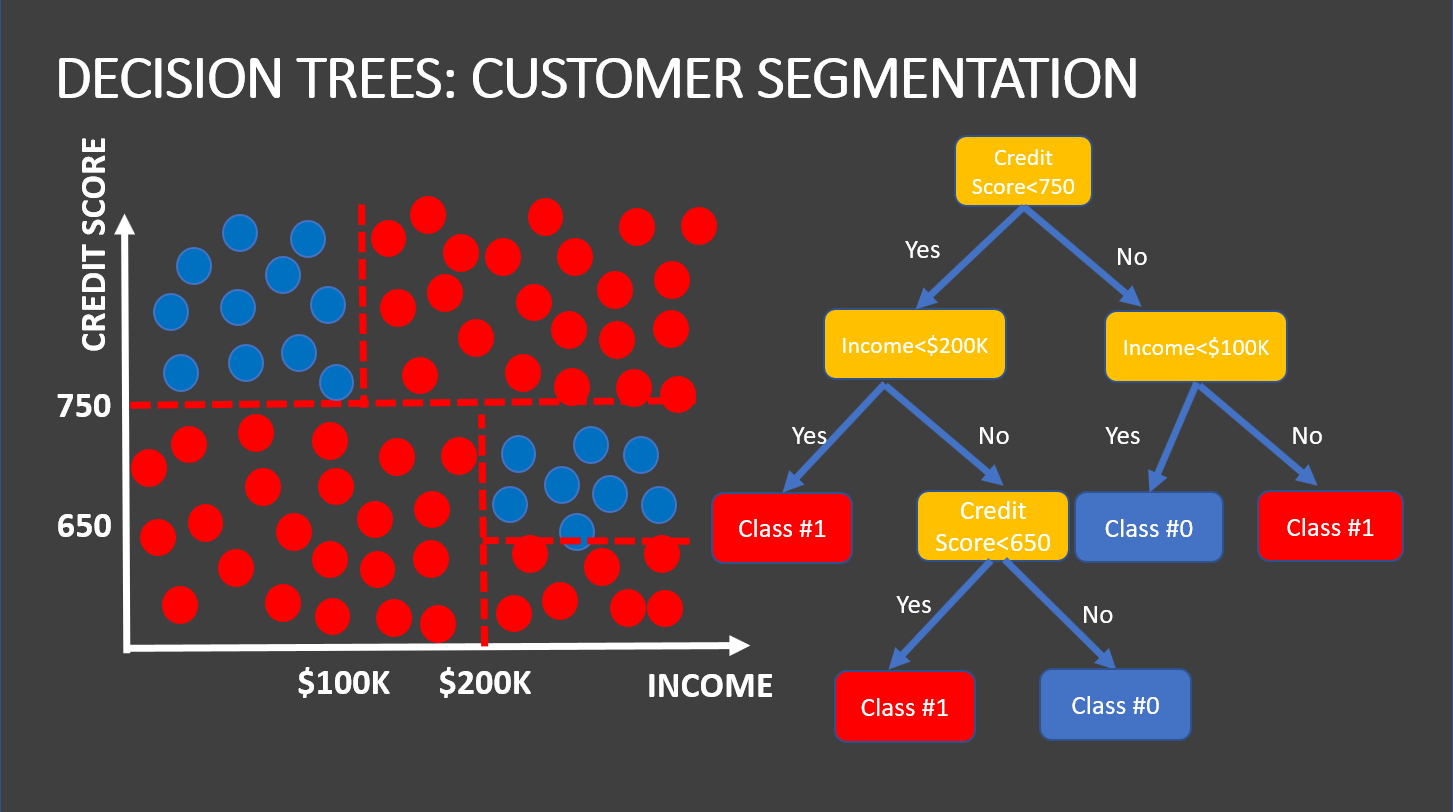

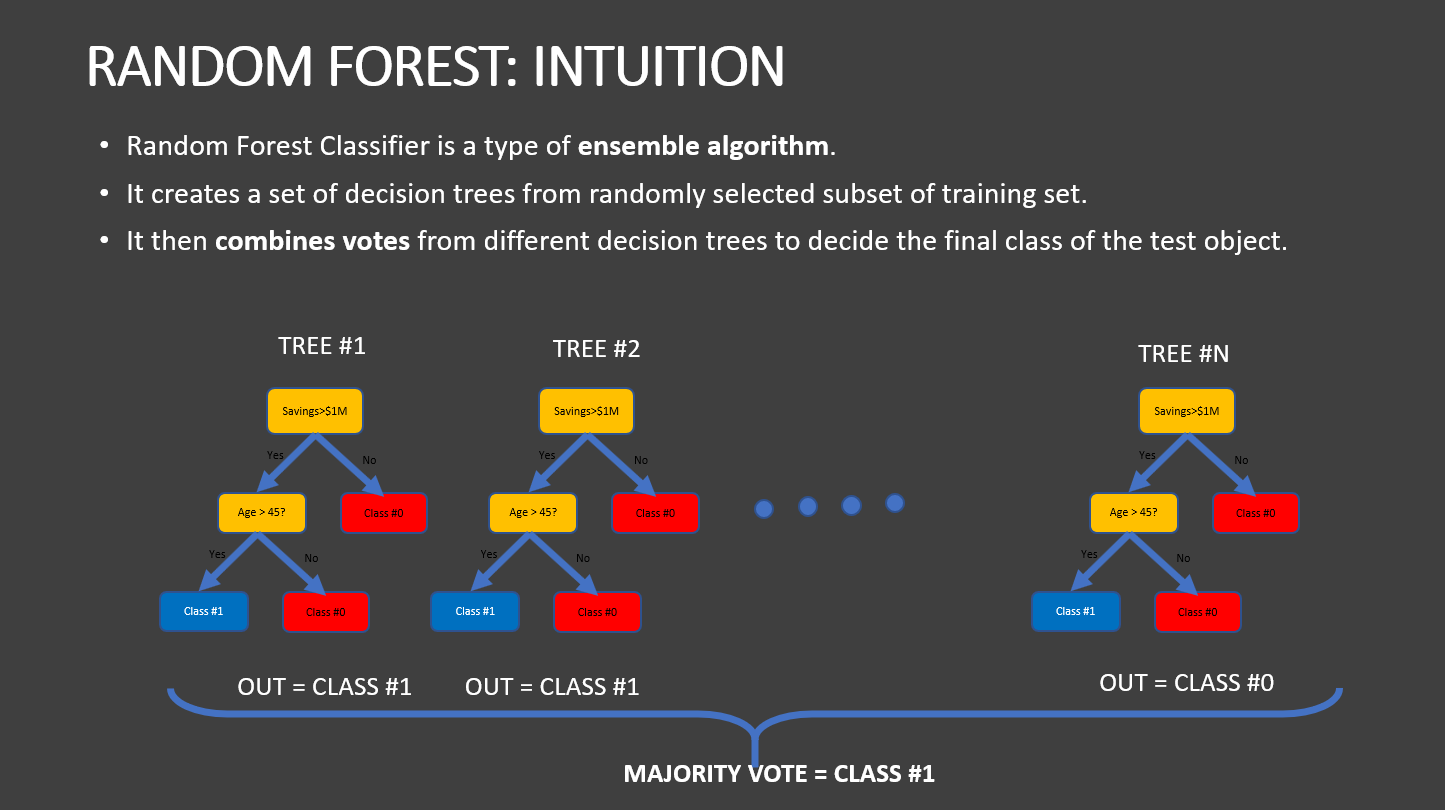

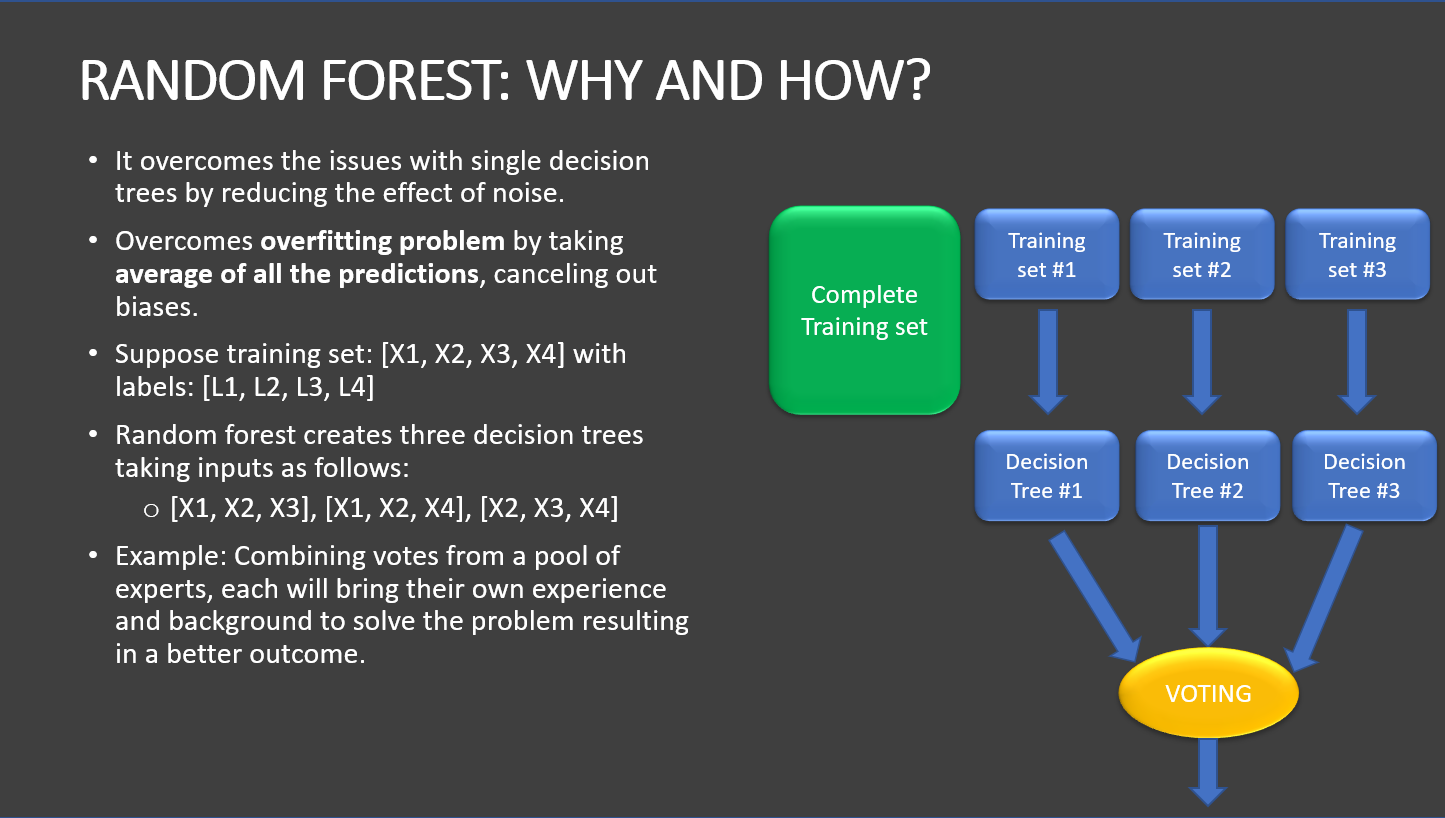

# TASK #8: RECREATE AND EVALUATE THE MODEL USING DECISION TREE 

In [19]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

<AxesSubplot:>

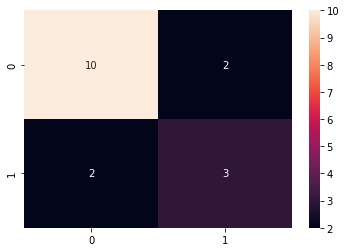

In [20]:
# Predicting the Test set results
y_predict_test = decision_tree.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [21]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.60      0.60      0.60         5

    accuracy                           0.76        17
   macro avg       0.72      0.72      0.72        17
weighted avg       0.76      0.76      0.76        17



In [22]:
model_accuracy["Decision_Tree"]=accuracy_score(y_test,y_predict_test)

In [23]:
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances)

        importance
Age       0.457773
Start     0.290598
Number    0.251629


# TASK #9 RECREATE AND EVALUATE MODEL USING RANDOM FOREST
- **Train a random forest classifier model and assess its performance**
- **Plot the confusion matrix**
- **Print the classification Report**


In [24]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier()
random_forest.fit(x_train,y_train)


RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.50      0.40      0.44         5

    accuracy                           0.71        17
   macro avg       0.63      0.62      0.62        17
weighted avg       0.69      0.71      0.70        17



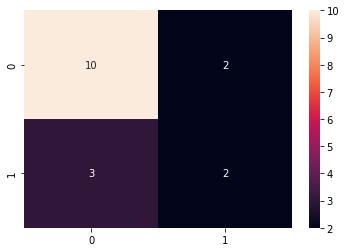

In [25]:
y_predict_test=random_forest.predict(x_test)
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_predict_test))
model_accuracy["Random_Forest"]=accuracy_score(y_test,y_predict_test)

# TASK #10 RECREATE AND EVALUATE MODEL USING KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
testingScores=[]
trainingScores=[]
K=[]
scores={}

for k in range(1,64):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
  
    training_score = knn.score(x_train, y_train)
    test_score = knn.score(x_test, y_test)
    K.append(k)
  
    trainingScores.append(training_score)
    testingScores.append(test_score)
    scores[k] = [training_score, test_score]


In [28]:
for keys, values in scores.items():
    print(keys, ':', values)

1 : [1.0, 0.6470588235294118]
2 : [0.8125, 0.7058823529411765]
3 : [0.8125, 0.5882352941176471]
4 : [0.8125, 0.7058823529411765]
5 : [0.796875, 0.7058823529411765]
6 : [0.8125, 0.7058823529411765]
7 : [0.8125, 0.7058823529411765]
8 : [0.8125, 0.7058823529411765]
9 : [0.8125, 0.7058823529411765]
10 : [0.8125, 0.7058823529411765]
11 : [0.8125, 0.7058823529411765]
12 : [0.8125, 0.7058823529411765]
13 : [0.8125, 0.7058823529411765]
14 : [0.8125, 0.7058823529411765]
15 : [0.8125, 0.7058823529411765]
16 : [0.8125, 0.7058823529411765]
17 : [0.8125, 0.7058823529411765]
18 : [0.8125, 0.7058823529411765]
19 : [0.8125, 0.7058823529411765]
20 : [0.8125, 0.7058823529411765]
21 : [0.8125, 0.7058823529411765]
22 : [0.8125, 0.7058823529411765]
23 : [0.8125, 0.7058823529411765]
24 : [0.8125, 0.7058823529411765]
25 : [0.8125, 0.7058823529411765]
26 : [0.8125, 0.7058823529411765]
27 : [0.8125, 0.7058823529411765]
28 : [0.8125, 0.7058823529411765]
29 : [0.8125, 0.7058823529411765]
30 : [0.8125, 0.70588235

In [468]:
plt.scatter(K, trainingScores, color ='k')
plt.scatter(K, testingScores, color ='g')
plt.show()

              precision    recall  f1-score   support

           0       0.67      0.83      0.74        12
           1       0.00      0.00      0.00         5

    accuracy                           0.59        17
   macro avg       0.33      0.42      0.37        17
weighted avg       0.47      0.59      0.52        17



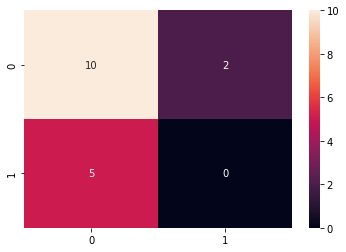

In [469]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
y_predict_test=knn.predict(x_test)
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_predict_test))


In [470]:
model_accuracy["KNN"]=accuracy_score(y_test,y_predict_test)

# TASK #11 RECREATE AND EVALUATE MODEL USING NAIVE BAYES

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        12
           1       0.50      0.20      0.29         5

    accuracy                           0.71        17
   macro avg       0.62      0.56      0.55        17
weighted avg       0.66      0.71      0.66        17



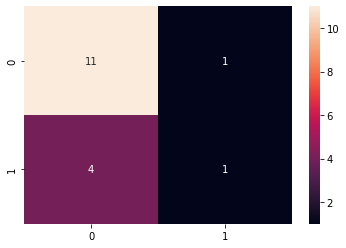

In [471]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_predict_test=gnb.predict(x_test)
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_predict_test))
model_accuracy["Gaussian_Naive_Bayes"]=accuracy_score(y_test,y_predict_test)

# TASK #12 RECREATE AND EVALUATE MODEL USING SVM

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        12
           1       0.50      0.20      0.29         5

    accuracy                           0.71        17
   macro avg       0.62      0.56      0.55        17
weighted avg       0.66      0.71      0.66        17



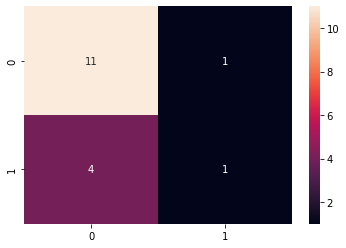

In [472]:
from sklearn.svm import SVC
SVM=SVC(kernel="linear")
SVM.fit(x_train,y_train)
y_predict_test=SVM.predict(x_test)
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_predict_test))
model_accuracy["SVM"]=accuracy_score(y_test,y_predict_test)

In [473]:
for keys, values in model_accuracy.items():
    print(keys, ':', values)

Logistic_Regression : 0.6470588235294118
Decision_Tree : 0.7647058823529411
Random_Forest : 0.5882352941176471
KNN : 0.5882352941176471
Gaussian_Naive_Bayes : 0.7058823529411765
SVM : 0.7058823529411765


# TASK #13 RECREATE AND EVALUATE MODEL USING NEURAL NETWORK

In [474]:
import keras

In [475]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [476]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test) 
nn=Sequential()
nn.add(Dense(3,activation="relu",input_shape=(3,)))
nn.add(Dense(5,activation="relu"))
nn.add(Dense(2,activation="softmax"))
nn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])


In [477]:
nn.fit(x_train,y_train,validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
2/2 [==============================] - 1s 186ms/step - loss: 0.5194 - accuracy: 0.8125 - val_loss: 0.4053 - val_accuracy: 0.7059
Epoch 2/50
2/2 [==============================] - 0s 27ms/step - loss: 0.5173 - accuracy: 0.8125 - val_loss: 0.4065 - val_accuracy: 0.7059
Epoch 3/50
2/2 [==============================] - 0s 26ms/step - loss: 0.5160 - accuracy: 0.8125 - val_loss: 0.4070 - val_accuracy: 0.7059
Epoch 4/50
2/2 [==============================] - 0s 25ms/step - loss: 0.5149 - accuracy: 0.8125 - val_loss: 0.4076 - val_accuracy: 0.7059
Epoch 5/50
2/2 [==============================] - 0s 25ms/step - loss: 0.5139 - accuracy: 0.8125 - val_loss: 0.4085 - val_accuracy: 0.7059
Epoch 6/50
2/2 [==============================] - 0s 25ms/step - loss: 0.5128 - accuracy: 0.8125 - val_loss: 0.4092 - val_accuracy: 0.7059
Epoch 7/50
2/2 [==============================] - 0s 25ms/step - loss: 0.5119 - accuracy: 0.8125 - val_loss: 0.4101 - val_accuracy: 0.7059
Epoch 8/50
2/2 [==========

In [478]:
y_predict_test=nn.predict(x_test)
score=nn.evaluate(x_test,y_test)

1/1 [==============================] - 0s 44ms/step - loss: 0.4271 - accuracy: 0.7059


In [479]:
print(score[1])
model_accuracy["Neural_Network"]=score[1]

0.7058823704719543


# Result

In [480]:
for keys, values in model_accuracy.items():
    print(keys, ':', values)

Logistic_Regression : 0.6470588235294118
Decision_Tree : 0.7647058823529411
Random_Forest : 0.5882352941176471
KNN : 0.5882352941176471
Gaussian_Naive_Bayes : 0.7058823529411765
SVM : 0.7058823529411765
Neural_Network : 0.7058823704719543


In [491]:
print(gnb.predict([[79,9,5]])[0])

1


c:\Users\acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


**THIS MODEL WILL BE USED TO CREATE WEBSITE THAT CAN PREDICT WHETHER PERSON HAVE KYPHOSIS OR NOT**